In [1]:
# Program to produce plots of radial averages of storm
#  for Hurricane Florence (2018)
#
# Joseph B. Zambon
# 11 Jan 2021

In [2]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
import cmocean
import numpy as np
get_ipython().magic(u'pylab inline')
import pdb
import numpy as np
import pylab as py
import radial_data as rad


Populating the interactive namespace from numpy and matplotlib


In [3]:
t_slice = 15
num_levs = 46
center = [75,75]

#WRF files
root_wrf      = '/raid0/datasets/hindcast/florence/waf_revisions/analysis/cross-section/'
wrf_control   = root_wrf + 'wrf_control_d02_plevs2.nc'

wrf_control = Dataset(wrf_control)


In [4]:
azi_avg = np.array([])
for p_lev in np.arange(0,num_levs,1):
    # Create coordinate grid
    npix = 150.
    x = np.arange(npix) - npix/2.
    xx, yy = np.meshgrid(x, x)
    r = np.sqrt(xx**2 + yy**2)
    fake_psf = sqrt(wrf_control['u_tr_p'][t_slice,p_lev,:,:]** 2 + wrf_control['v_tr_p'][t_slice,p_lev,:,:]** 2)
    simulation = fake_psf

    rad_stats = rad.radial_data(simulation, x=xx, y=yy)
    km_rad = rad_stats.r *3  #convert grid -> km from center (3km/grid point)

#     py.figure()
#     py.plot(km_rad, rad_stats.mean)
#     py.xlabel('km from Center')
#     py.ylabel('Wind Azimuthal Average')
    rad_stats.mean[rad_stats.mean==0] = np.nan
    azi_avg = np.append(azi_avg,rad_stats.mean)

azi_avg=np.reshape(azi_avg,(num_levs,107))

/home/jbzambon/anaconda3/envs/florence_wave_analysis/lib/python3.8/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


In [8]:
plevs = [1000., 980., 960., 940., 920., 900., \
                880., 860., 840., 820., 800., \
                780., 760., 740., 720., 700., \
                680., 660., 640., 620., 600., \
                580., 560., 540., 520., 500., \
                480., 460., 440., 420., 400., \
                380., 360., 340., 320., 300., \
                280., 260., 240., 220., 200., \
                180., 160., 140., 120., 100.]
[xxx,yyy] = meshgrid(km_rad,plevs)

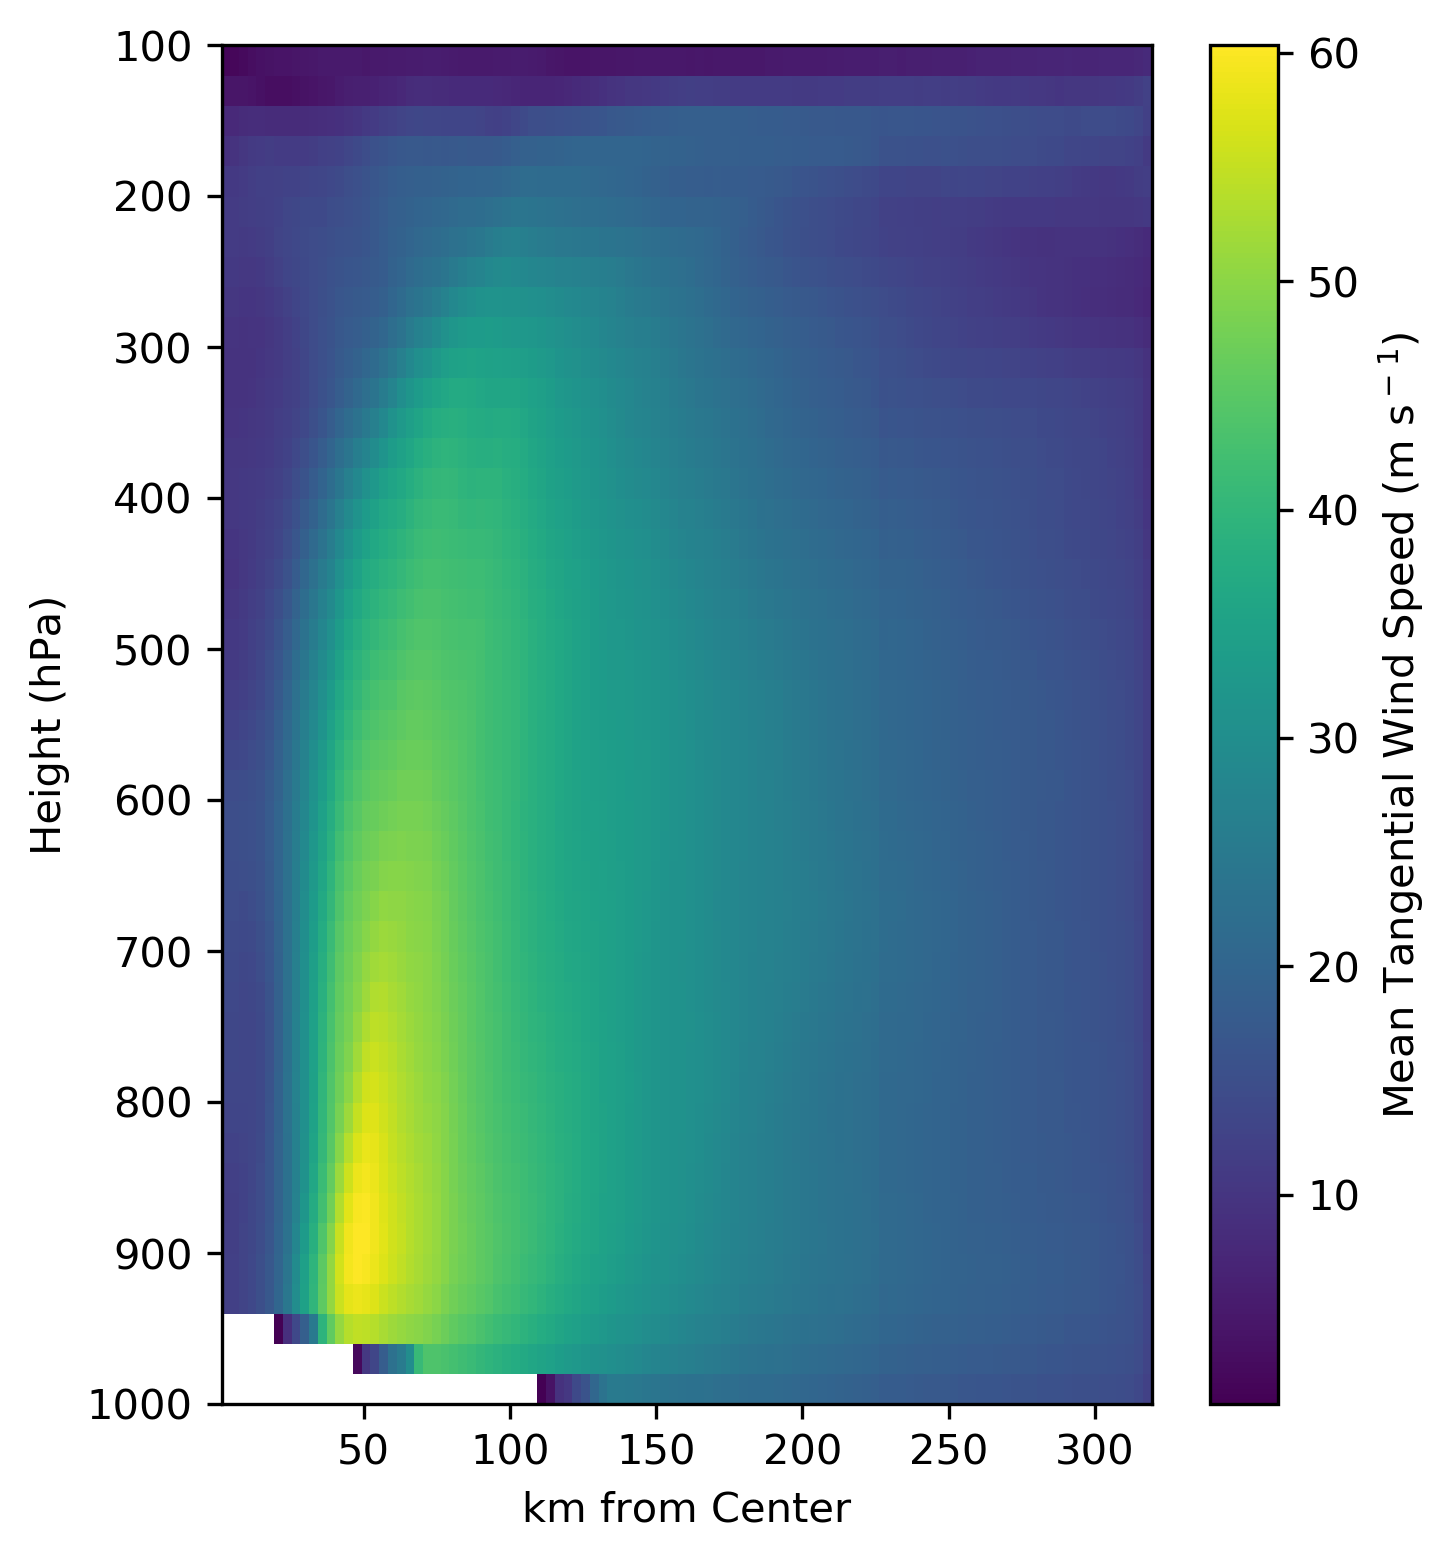

In [22]:
fig1=plt.figure(figsize=(5,6),dpi=300)
plt.pcolormesh(xxx,yyy,azi_avg,shading='gourad')
plt.gca().invert_yaxis()
py.xlabel('km from Center')
py.ylabel('Height (hPa)')
plt.colorbar(label='Mean Tangential Wind Speed (m s$^-$$^1$)')
plt.savefig('wrf_control_plevs_t' + str(t_slice) , bbox_inches = 'tight')